In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\abc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
df = pd.read_csv('ushape.csv')

In [9]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [12]:
df.columns = ['x','y','class']

In [13]:
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [14]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

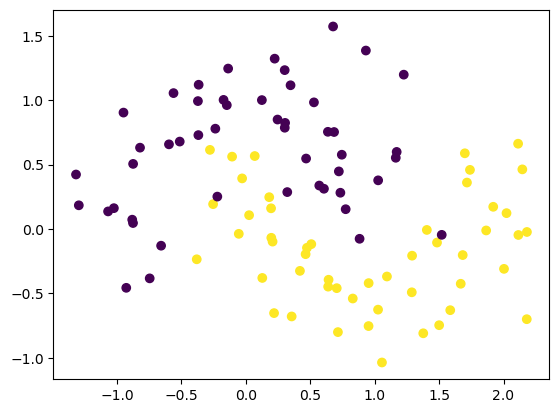

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

<Axes: >

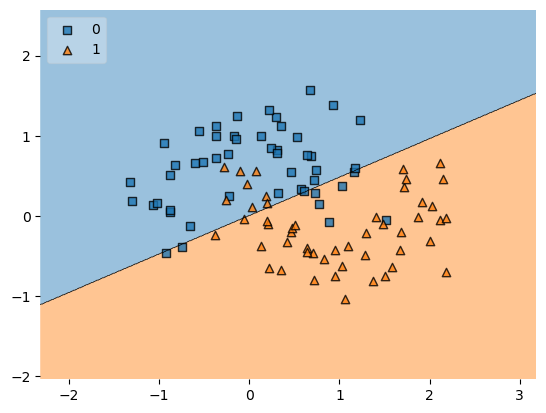

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf,legend = 2)

In [19]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring = 'accuracy',cv =10))

0.8300000000000001

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)

In [21]:
x_trf = poly.fit_transform(X)

In [22]:
clf1 = LogisticRegression()

In [23]:
np.mean(cross_val_score(clf1,x_trf,y,scoring= 'accuracy', cv= 10))

0.9099999999999999

In [39]:
def plot_decision_boundary(X,y,degree=1):
    poly = PolynomialFeatures(degree = degree)
    x_trf = poly.fit_transform(X)
    clf = LogisticRegression()
    clf.fit(x_trf,y)
    accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring = 'accuracy', cv = 10))
    
    a = np.arange(start = X[:,0].min()-1,stop = X[:,0].max()+1,step = 0.01)
    b = np.arange(start = X[:,1].min()-1, stop = X[:,1].max()+1,step = 0.01)
    
    XX, yy = np.meshgrid(a,b)
    
    input_array  = np.array([XX.ravel(),yy.ravel()]).T
    labels = clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,yy,labels.reshape(XX.shape), alpha = 0.5)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title('Degree = {}, accuracy is{}'.format(degree,np.round(accuracy,4)))

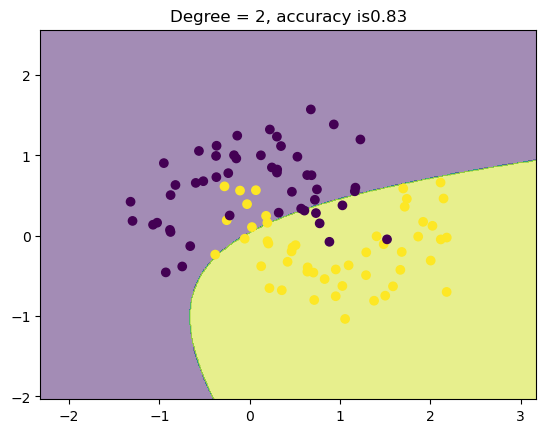

In [40]:
plot_decision_boundary(X,y,degree=2)

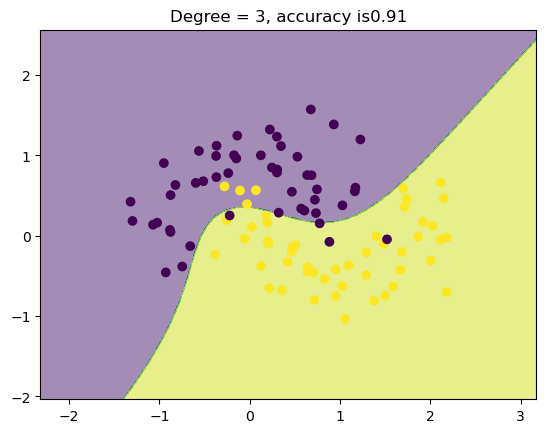

In [41]:
plot_decision_boundary(X,y,degree=3)

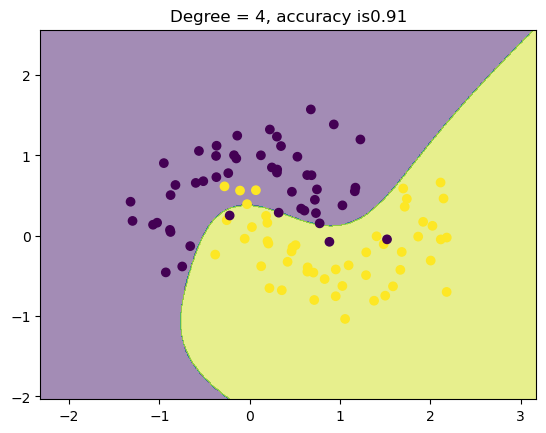

In [42]:
plot_decision_boundary(X,y,degree=4)

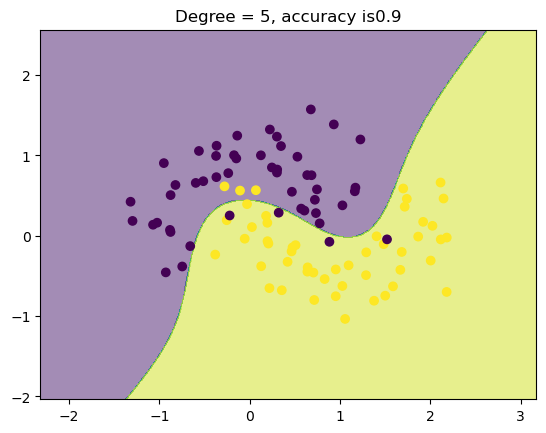

In [43]:
plot_decision_boundary(X,y,degree=5)

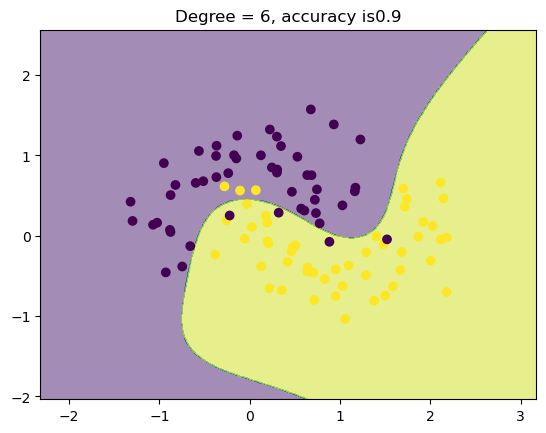

In [44]:
plot_decision_boundary(X,y,degree=6)

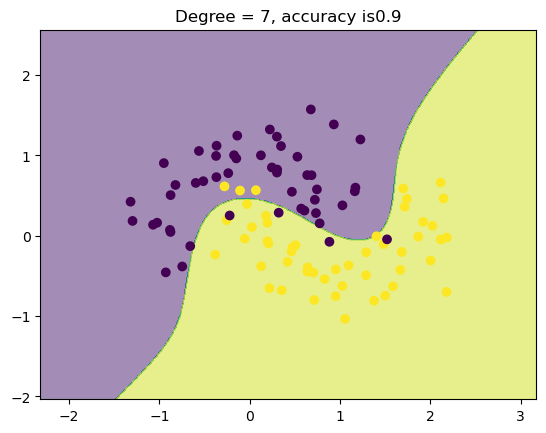

In [45]:
plot_decision_boundary(X,y,degree=7)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

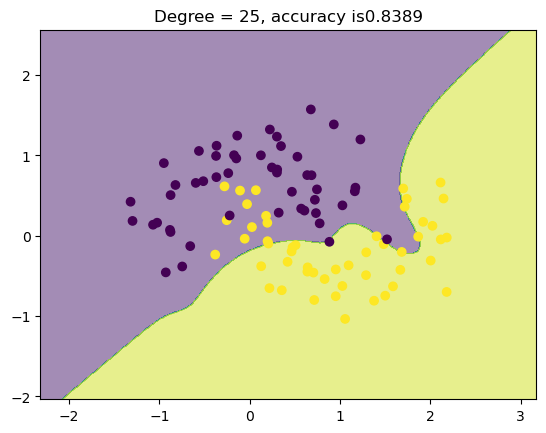

In [46]:
plot_decision_boundary(X,y,degree=25)